# Explore Data and Predicting Risk
Consider the short amount of time doing this task, there will be a lot of improvement

# Preprocessing Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline


pd.options.mode.chained_assignment = None 

In [0]:
df_customer = pd.read_csv("customer_data_ratio20.csv", sep=',') #1126 records
df_payment = pd.read_csv("payment_data_ratio20.csv", sep=',') #8251 records

In [0]:
#check total NA values for each columns
print("Feature  \t\t Nan Count   \t Pct")
for i,c in df_customer.T.iterrows():
    count = sum(c.isna())
    count = float(count)
    if count >0:
        print("%s   \t%5d   \t%.2f%%"  %(i, count, (count/int(df_customer.shape[0])*100)))

Feature  		 Nan Count   	 Pct
fea_2   	  149   	13.24%


In [0]:
#check total NA values for each columns
print("Feature  \t\t Nan Count   \t Pct")
for i,c in df_payment.T.iterrows():
    count = sum(c.isna())
    count = float(count)
    if count >0:   
        print("%s   \t%5d   \t%.2f%%"  %(i, count, (count/int(df_payment.shape[0])*100)))

Feature  		 Nan Count   	 Pct
prod_limit   	 6118   	74.16%
update_date   	   26   	0.32%
highest_balance   	  409   	4.96%
report_date   	 1114   	13.50%


In [0]:
#drop all columns that have NA/NaN values >= 70%
df_payment = df_payment.dropna(axis=1, how='all')
df_payment = df_payment.drop('prod_limit', axis=1)

In [0]:
df_payment.head(10)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,03/12/2016,15147.6,NaN,26/04/2016
5,59004828,0,0,0,0,3,10,02/12/2016,3196.8,6193.0,15/04/2016
6,58994429,0,0,0,0,2,10,02/12/2016,3252.0,3210.0,NaN
7,54987756,0,0,0,0,2,1,02/12/2016,365331.6,304943.0,NaN
8,58988028,0,0,0,0,4,0,02/12/2016,16795.2,28500.0,19/04/2016
9,58993180,0,0,0,0,3,6,02/12/2016,26688.0,31300.0,20/03/2016


In [0]:
#Fill missing data
payment_median = df_payment['highest_balance'].median()
df_payment['highest_balance'] = df_payment['highest_balance'].fillna(payment_median)

In [0]:
customer_fea2_median = df_customer['fea_2'].median()
df_customer['fea_2'] = df_customer['fea_2'].fillna(customer_fea2_median)

In [0]:
df_payment['report_date'] = pd.to_datetime(df_payment['report_date'])
df_payment['update_date'] = pd.to_datetime(df_payment['update_date'])

In [0]:
#fill missing date with most occured date
idx = pd.date_range(df_payment['report_date'].min(), df_payment['report_date'].max())
s = df_payment.groupby(['report_date']).size()
df_payment['report_date'] = df_payment['report_date'].fillna(s.idxmax())

idx = pd.date_range(df_payment['update_date'].min(), df_payment['update_date'].max())
s = df_payment.groupby(['update_date']).size()
df_payment['update_date'] = df_payment['update_date'].fillna(s.idxmax())

In [0]:
#Merging payment csv file and customer csv file, so that all the features are available in one Datframe
df_final = pd.merge(df_payment, df_customer, on="id")
df_final.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,report_date,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,58987402,0,0,0,0,1,10,2016-04-12,0.0,44047.0,2015-09-21,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0
1,58987402,0,0,0,0,1,0,2016-04-10,42000.0,35500.0,2015-09-21,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0
2,58987402,0,0,0,0,2,10,2016-02-13,7938.0,7115.0,2016-03-24,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0
3,58987402,0,0,0,0,9,10,2015-07-27,30039.6,48061.0,2016-04-08,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0
4,58987402,0,0,0,0,1,0,2011-07-12,0.0,150500.0,2015-09-21,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0


In [0]:
#check if merging is correct
#df_final['id'].value_counts()
#df_final[df_final['id']==58988212]

# Exploring insights and relationship from data

In [0]:
df_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,8250.0,5.782173e+07,1.822724e+06,54982353.0,54990497.00,5.898905e+07,5.899655e+07,5.900624e+07
OVD_t1,8250.0,2.490909e-01,1.250197e+00,0.0,0.00,0.000000e+00,0.000000e+00,3.400000e+01
OVD_t2,8250.0,1.271515e-01,8.600464e-01,0.0,0.00,0.000000e+00,0.000000e+00,3.400000e+01
OVD_t3,8250.0,3.692121e-01,2.900320e+00,0.0,0.00,0.000000e+00,0.000000e+00,3.500000e+01
OVD_sum,8250.0,1.876817e+02,1.804233e+03,0.0,0.00,0.000000e+00,0.000000e+00,3.150000e+04
pay_normal,8250.0,1.452667e+01,1.205363e+01,0.0,4.00,1.100000e+01,2.500000e+01,3.600000e+01
prod_code,8250.0,8.232000e+00,3.533055e+00,0.0,6.00,1.000000e+01,1.000000e+01,2.700000e+01
new_balance,8250.0,1.054042e+05,1.887704e+06,-40303.2,0.00,0.000000e+00,2.494800e+04,1.632120e+08
highest_balance,8250.0,2.105192e+05,2.744138e+06,501.0,24499.25,4.404700e+04,1.005000e+05,1.800005e+08
label,8250.0,1.681212e-01,3.739966e-01,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00


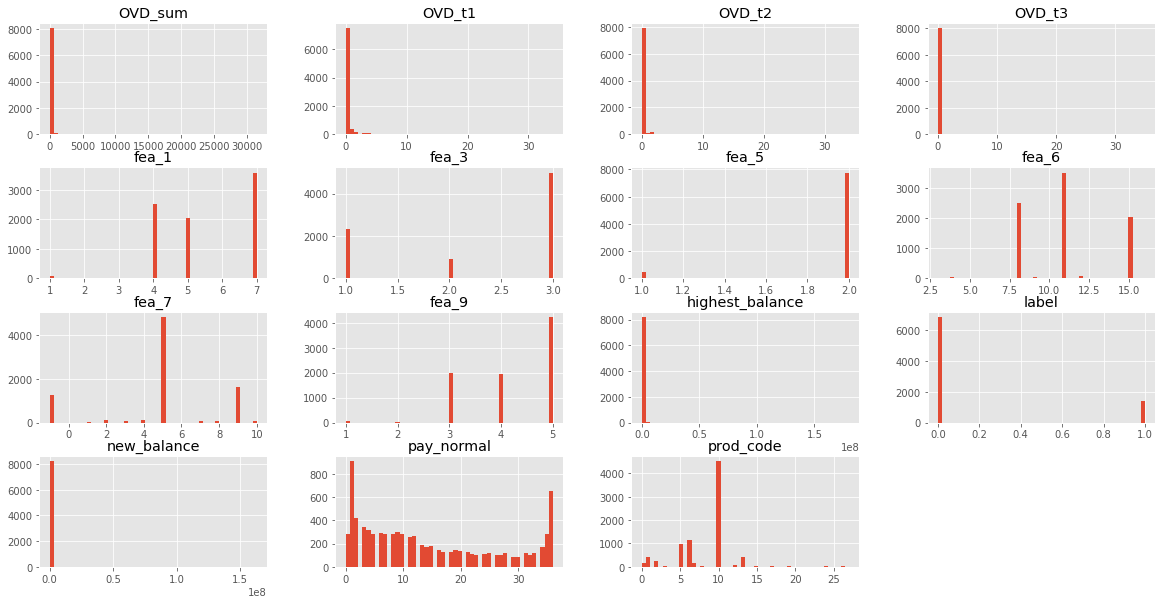

In [0]:
#Overview of data
plot.rcParams['figure.figsize'] = (20, 10)
plot.style.use('ggplot')
#df_final.loc[:, df_final.columns != 'id', 'fea_2', 'fea_4', 'fea_8'].hist(bins=50);
df_final[df_final.columns.difference(['id', 'fea_2', 'fea_4', 'fea_8', 'fea_10', 'fea_11'])].hist(bins=50);

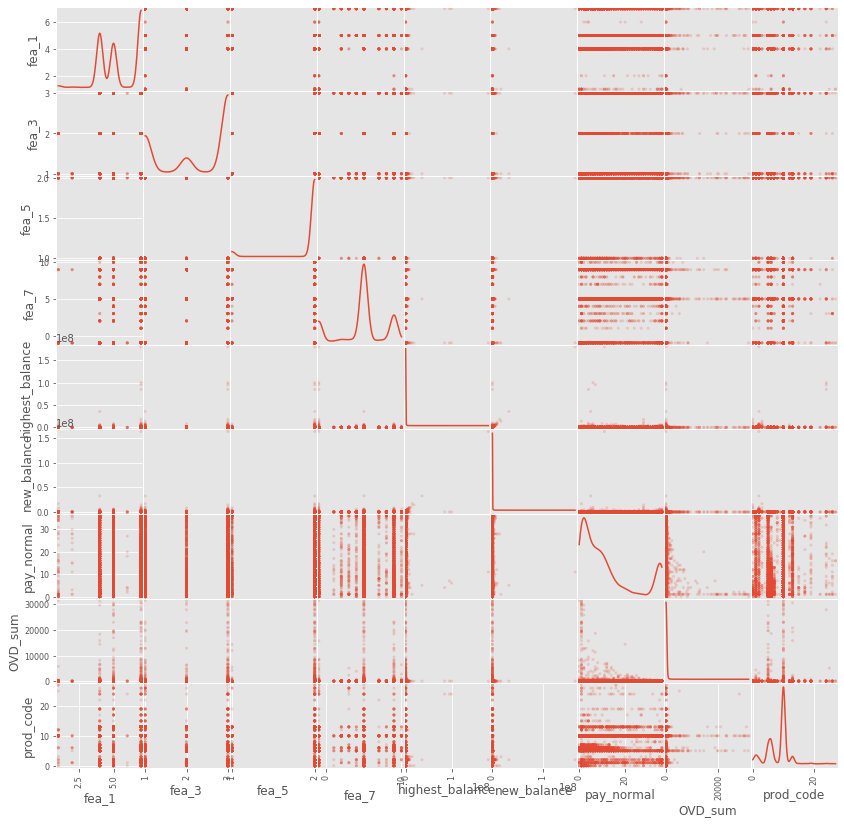

In [0]:
from pandas.plotting import scatter_matrix
df_feature_1 = df_final[['fea_1', 'fea_3', 'fea_5','fea_7','highest_balance','new_balance','pay_normal', 'OVD_sum', 'prod_code']]
scatter_matrix(df_feature_1, alpha=0.2, figsize=(14, 14), diagonal='kde');

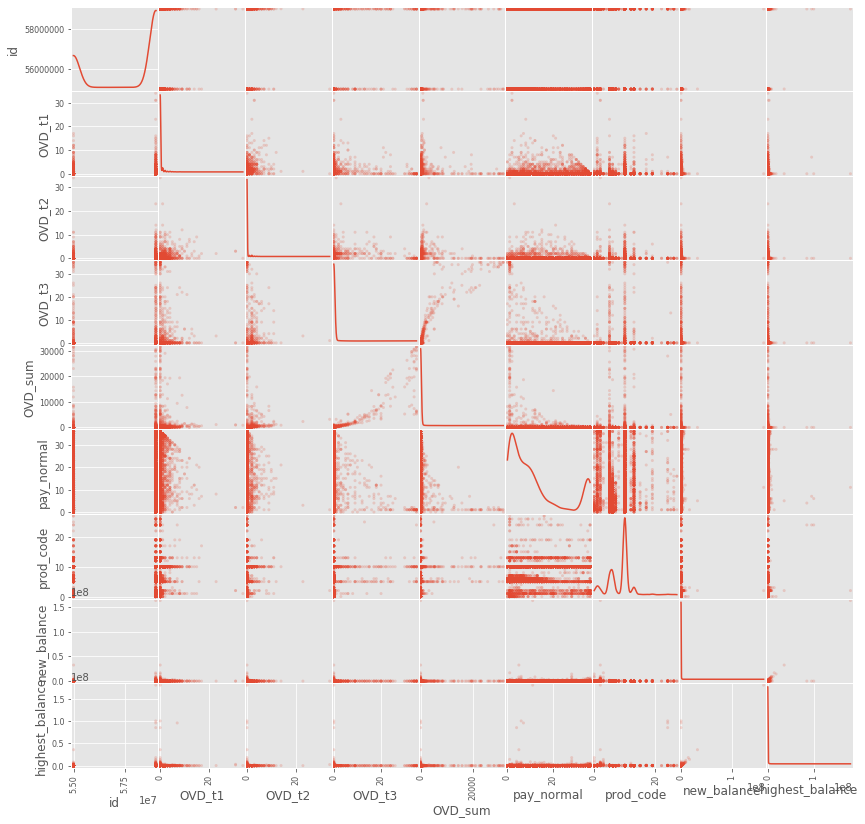

In [0]:
#Overdue type 3 has strong correlation (positive) with sum of overdue days
scatter_matrix(df_payment, alpha=0.2, figsize=(14, 14), diagonal='kde');

In [0]:
#Calculate mean and median of each customer, majority them usually bought about 2-3 products.
df_prod_no = df_final.groupby(['id','prod_code'])['prod_code'].count().reset_index(name="COUNT").reindex(columns=['id','COUNT'])
print(df_prod_no['COUNT'].mean(), df_prod_no['COUNT'].median())


2.699607329842932 2.0


In [0]:
#The product that people buy most is prod_code 10
most_product_id = df_final['prod_code'].value_counts().nlargest(1).index[0]
most_product_id

10

In [0]:
#filter the dataset by the product ID, then cluster over it
df_cluster = df_final[df_final['prod_code']==most_product_id]
df_cluster_n = df_cluster[['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7','fea_9', 'label', 'highest_balance','new_balance','pay_normal', 'OVD_sum']]
df_cluster_n = df_cluster_n.fillna(method='ffill')

In [0]:
# #rescale data before clustering so the clusters\
# #won't be dominated by a specific field
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() 
# names = df_cluster_n.columns
# index = df_cluster_n.index
# data_scaled = scaler.fit_transform(df_cluster_n)
# data_scaled = pd.DataFrame(data_scaled, index=index, columns=names) 

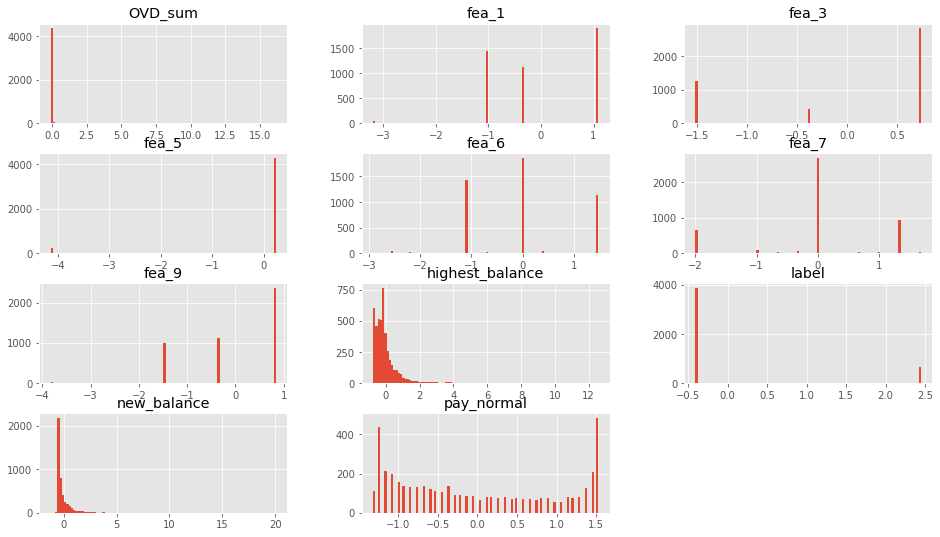

In [0]:
#scale-normalize 0-1
plot.rcParams['figure.figsize'] = (16, 9)
plot.style.use('ggplot')
data_scaled.hist(bins=100);

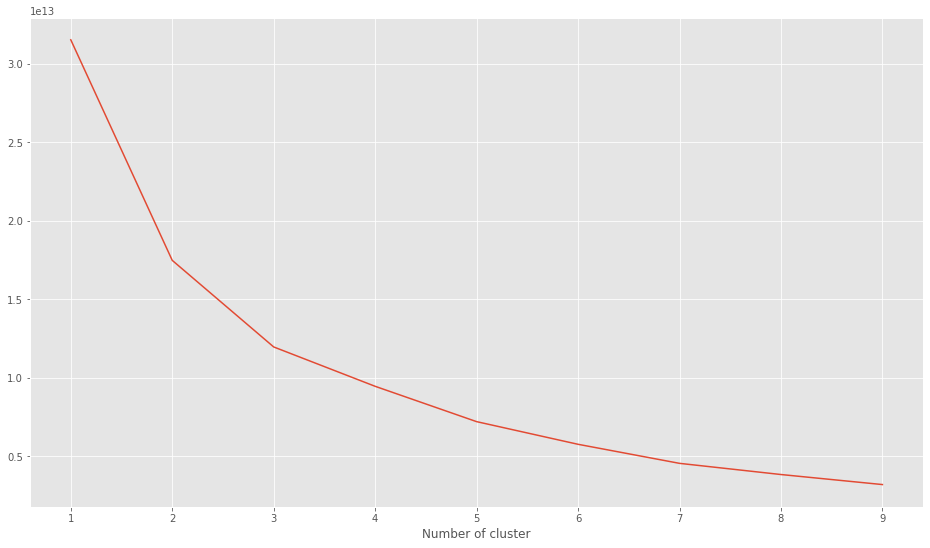

In [0]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster_n)
    data_scaled["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plot.figure()
plot.plot(list(sse.keys()), list(sse.values()))
plot.xlabel("Number of cluster")
plot.show();

In [0]:
#Choose 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_cluster_n)
df_cluster_n['Cluster'] = kmeans.predict(df_cluster_n)

df_cluster_n['id'] = df_cluster['id']

#df_cluster_n["Cluster"] = data_scaled["Cluster"]


In [0]:
#distribution of customer target with the most popular product 10
df_cluster_n

,fea_1,fea_3,fea_5,fea_6,fea_7,fea_9,label,highest_balance,new_balance,pay_normal,OVD_sum,Cluster,id
0,5,3,2,15,9,4,0,44047.0,0.0,1,0,0,58987402
2,5,3,2,15,9,4,0,7115.0,7938.0,2,0,0,58987402
3,5,3,2,15,9,4,0,48061.0,30039.6,9,0,0,58987402
13,7,2,2,11,9,4,1,38091.0,0.0,1,0,0,58995151
14,7,2,2,11,9,4,1,74039.0,0.0,21,2160,0,58995151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,1,1,2,4,9,5,0,40863.0,0.0,34,30,0,58982397
8246,1,1,2,4,9,5,0,1052.0,-1.2,1,0,0,58982397
8247,1,1,2,4,9,5,0,27287.0,0.0,23,0,0,58982397
8248,1,1,2,4,9,5,0,6380.0,0.0,3,0,0,58982397


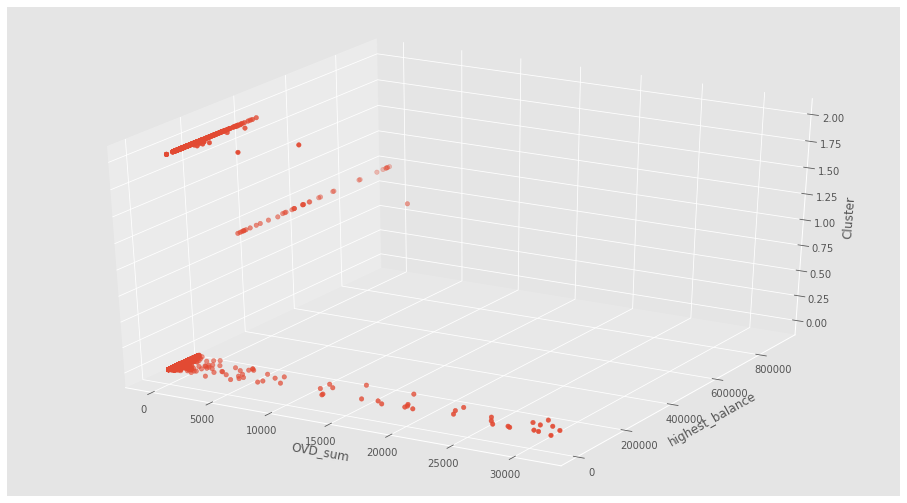

In [0]:
#See the relationship between some features in clusters
#Cluster 2: lower to medium of highest_balance and overdue days. "Play it safe". Have some outliers
#Cluster 0: lowest end of highest_balance, and highest overdue days. Have most overdue days 
#Cluster 1: Widest range and have the highest number of highest_balance. Less sum of overdue days than cluster 0 and 2
from mpl_toolkits.mplot3d import Axes3D
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cluster_n['OVD_sum'], df_cluster_n['highest_balance'], df_cluster_n['Cluster'])
ax.set_xlabel('OVD_sum')
ax.set_ylabel('highest_balance')
ax.set_zlabel('Cluster')
plot.show()

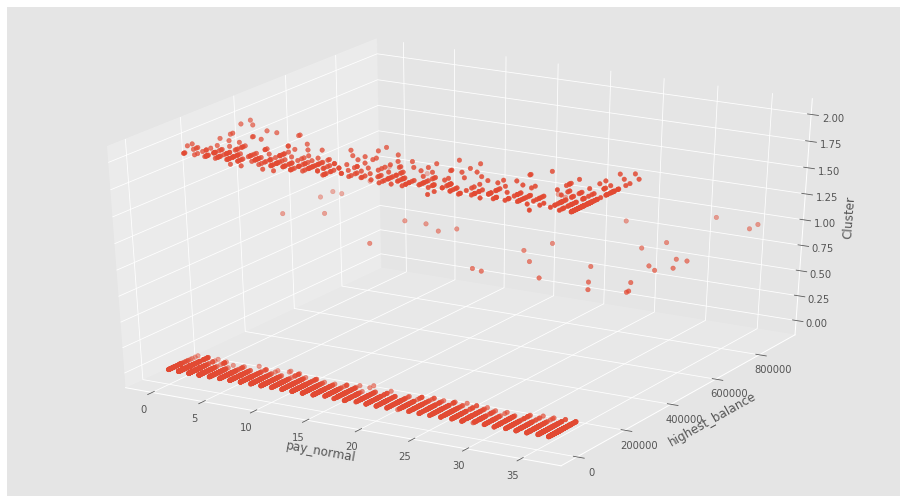

In [0]:
#No. time of normal payment:
#Cluster 0: Have the most people that mostly pay by normal method. Unify.
#Cluster 1: Have least people that have normal pay. Scatter a lot. Highest balance
#Cluster 2: Wider range from medium to high of highest balance and have quite a lot of people pay by normal method
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cluster_n['pay_normal'], df_cluster_n['highest_balance'], df_cluster_n['Cluster'])
ax.set_xlabel('pay_normal')
ax.set_ylabel('highest_balance')
ax.set_zlabel('Cluster')
plot.show()

# Predict Risk Modelling


In [0]:
#drop duplicate rows
df_final.drop_duplicates(keep=False,inplace=True)

In [0]:
df_final

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,report_date,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,58987402,0,0,0,0,1,10,2016-04-12,0.0,44047.0,2015-09-21,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0
1,58987402,0,0,0,0,1,0,2016-04-10,42000.0,35500.0,2015-09-21,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0
2,58987402,0,0,0,0,2,10,2016-02-13,7938.0,7115.0,2016-03-24,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0
3,58987402,0,0,0,0,9,10,2015-07-27,30039.6,48061.0,2016-04-08,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0
4,58987402,0,0,0,0,1,0,2011-07-12,0.0,150500.0,2015-09-21,0,5,1241.0,3,62000.0,2,15,9,95,4,60023,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58982397,1,0,0,30,34,10,2006-01-13,0.0,40863.0,2009-04-26,0,1,1293.5,1,500000.0,2,4,9,105,5,650005,1.0
8246,58982397,0,0,0,0,1,10,2004-12-20,-1.2,1052.0,2006-06-04,0,1,1293.5,1,500000.0,2,4,9,105,5,650005,1.0
8247,58982397,0,0,0,0,23,10,2004-06-05,0.0,27287.0,2013-12-01,0,1,1293.5,1,500000.0,2,4,9,105,5,650005,1.0
8248,58982397,0,0,0,0,3,10,2003-10-25,0.0,6380.0,2005-03-20,0,1,1293.5,1,500000.0,2,4,9,105,5,650005,1.0


In [0]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df_final.loc[:, df_final.columns != 'label']
y = df_final['label']
#x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.6, random_state=42) 
x_train, x_test = train_test_split(df_final, test_size=0.3, random_state=42)


In [0]:
#drop all the duplicate ID - but it does not work well
#Need to consider trade off between generalization and accuracy
#cond = x_test['id'].isin(x_train['id']) == True
#x_test.drop(x_test[cond].index, inplace = True)

#Drop ID so that the training model cant see. Because it will be in the test set as well
train_id =  x_train['id']
test_id =  x_test['id']
x_test=x_test.drop(columns=['id'])
x_train=x_train.drop(columns=['id'])

In [0]:
y_test = x_test['label']
y_train = x_train['label']
x_test=x_test.drop(columns=['label'])
x_train=x_train.drop(columns=['label'])

In [0]:
x_test = x_test.drop(columns=['update_date','report_date'])
x_train=x_train.drop(columns=['update_date','report_date'])
x_test

,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,new_balance,highest_balance,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
744,0,0,0,0,0,6,0.0,28400.0,7,1254.5,3,97000.0,2,11,5,83,3,60017,282.842713
8106,0,0,0,0,36,10,129799.2,111447.0,5,1322.0,3,195000.0,2,15,5,90,3,60033,240.831892
3123,0,0,0,0,3,6,35932.8,39000.0,7,1241.0,3,71000.0,2,11,-1,80,5,450071,187.082869
3158,0,0,0,0,0,10,0.0,42355.0,4,1245.5,3,87000.0,2,8,5,112,5,60033,222.132843
4284,0,0,0,0,28,5,0.0,61500.0,4,1281.5,3,304000.0,2,8,5,84,3,60024,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,5,6,0.0,17000.0,4,1256.0,3,101000.0,2,8,9,110,5,60084,1.000000
1368,0,0,0,0,7,2,1349493.6,1130871.0,7,1346.0,1,148000.0,2,11,5,105,3,350000,244.948974
4445,0,0,0,0,36,5,2829.6,66500.0,7,1233.5,3,78000.0,2,11,5,105,3,60036,1.000000
5352,0,0,0,0,1,10,17476.8,41263.0,7,1281.5,2,50000.0,2,11,5,113,4,450080,167.564913


In [0]:
from sklearn.model_selection import GridSearchCV
#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.03,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

# Create parameters to search
gridParams = {
    'learning_rate': [0.03],
    'n_estimators': [8,16],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# View the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

# Run the grid
grid.fit(x_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)


Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s


{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.03, 'n_estimators': 16, 'num_leaves': 27, 'objective': 'binary', 'random_state': 501, 'subsample': 0.75}
0.8310033622367723
Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': 5, 'num_leaves': 27, 'learning_rate': 0.03, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.75, 'subsample_freq': 1, 'colsample_bytree': 0.64, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error'}


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   10.7s finished


In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
clf = lgb.train(params, d_train, 256)

In [0]:
#Predict on test/eval data. Get all the prob with >0.7 as 1 (high risk), otherwise 0 (low risk)
out = clf.predict(x_test)
y_predict =  np.where(out > 0.7, 1, 0)
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [0]:
print(y_test.to_list())

[0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [0]:
#Display accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict, y_test)
print('Accuracy is: {0:.2f}%'.format(accuracy*100))

Accuracy is: 89.35%


In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
cm = confusion_matrix(y_predict, y_test)

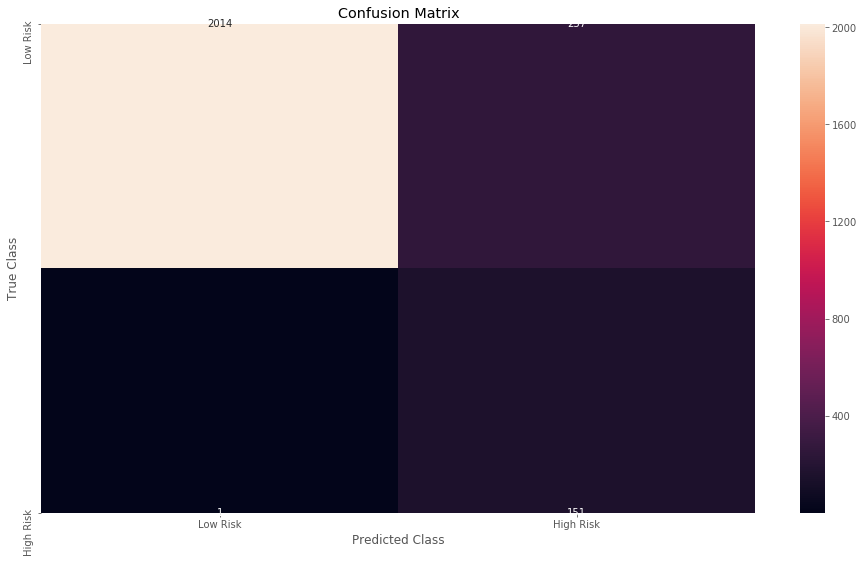

In [0]:
#Draw confusion matrix (TN, TP, FN, FP)
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['Low Risk', 'High Risk']
plt.figure(figs
ize=(16,9))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


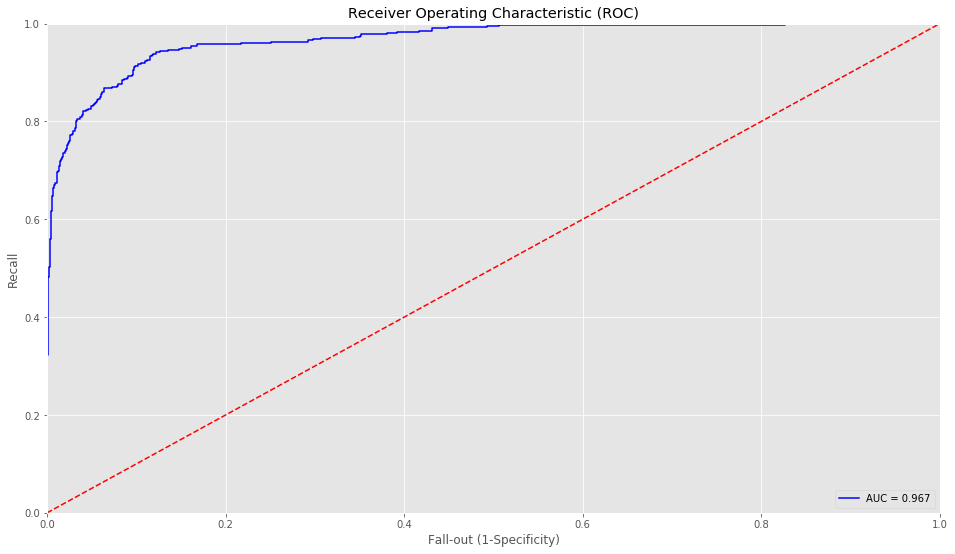

AUC score: 0.9667432978154041


In [0]:
#Evaluate the model, whether it is over-fitting, and the quality of the model
#tradeoff between TP and FP. An ROC curve (receiver operating characteristic curve) 
#is a graph showing the performance of a classification model at all classification thresholds.
#This curve plots TP and FP.
# An AUC score between 0.5 to 1 is good enough, and above 0.9 is reliable
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, out)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

In [0]:
#Save model then predict
from sklearn.externals import joblib
# save model
joblib.dump(clf, 'risk.pkl')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['risk.pkl']

In [0]:
# load model
model = joblib.load('risk.pkl')
df_out = x_test
df_out['truth'] = y_test
df_out['predicted'] = y_predict
df_out['id'] = test_id
df_out.to_csv("predict_risk.csv", index=True)

In [0]:
#display predicted result
df_out.head(100)

,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,new_balance,highest_balance,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,truth,predicted,id
744,0,0,0,0,0,6,0.0,28400.0,7,1254.5,3,97000.0,2,11,5,83,3,60017,282.842713,0,0,58995594
8106,0,0,0,0,36,10,129799.2,111447.0,5,1322.0,3,195000.0,2,15,5,90,3,60033,240.831892,1,0,58982754
3123,0,0,0,0,3,6,35932.8,39000.0,7,1241.0,3,71000.0,2,11,-1,80,5,450071,187.082869,1,1,54985691
3158,0,0,0,0,0,10,0.0,42355.0,4,1245.5,3,87000.0,2,8,5,112,5,60033,222.132843,0,0,58998876
4284,0,0,0,0,28,5,0.0,61500.0,4,1281.5,3,304000.0,2,8,5,84,3,60024,1.000000,0,0,58998566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,0,0,0,0,11,1,501434.4,485993.0,7,1370.0,3,394000.0,2,11,5,112,5,510009,445.038201,0,0,58993744
4689,0,0,0,0,14,5,188828.4,200500.0,7,1292.0,3,163000.0,2,11,5,109,5,60016,187.082869,0,0,54985862
5786,0,0,0,0,36,10,61200.0,81485.0,4,1191.5,3,50000.0,2,8,5,106,5,60090,1.000000,0,0,58998578
7957,0,0,1,110,35,10,0.0,30118.0,7,1281.5,2,73000.0,2,11,9,114,4,361000,153.391656,0,0,54985929
